# Implemeting SVM Classifier

In [1]:
## import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Know Your Data

In [2]:
data = pd.read_csv(r'C:\projects_endtoend\Elevate Labs\task7\Job_Placement_Data.csv')

In [3]:
data.head()

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [4]:
data.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [5]:
data.shape

(215, 13)

In [6]:
data.isna().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB


In [9]:
data.select_dtypes(exclude='object').describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [10]:
data.select_dtypes(include='object').describe()

,gender,ssc_board,hsc_board,hsc_subject,undergrad_degree,work_experience,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [11]:
categorical = data.select_dtypes(include='object').columns.tolist()
numerical = data.select_dtypes(exclude='object').columns.tolist()


In [12]:
for cat in categorical:
    print(f'{cat}:',data[cat].unique())

gender: ['M' 'F']
ssc_board: ['Others' 'Central']
hsc_board: ['Others' 'Central']
hsc_subject: ['Commerce' 'Science' 'Arts']
undergrad_degree: ['Sci&Tech' 'Comm&Mgmt' 'Others']
work_experience: ['No' 'Yes']
specialisation: ['Mkt&HR' 'Mkt&Fin']
status: ['Placed' 'Not Placed']


In [13]:
for num in numerical:
    print(f'{num}:',data[num].nunique())

ssc_percentage: 103
hsc_percentage: 97
degree_percentage: 89
emp_test_percentage: 100
mba_percent: 205


## Visualizing Numerical Features

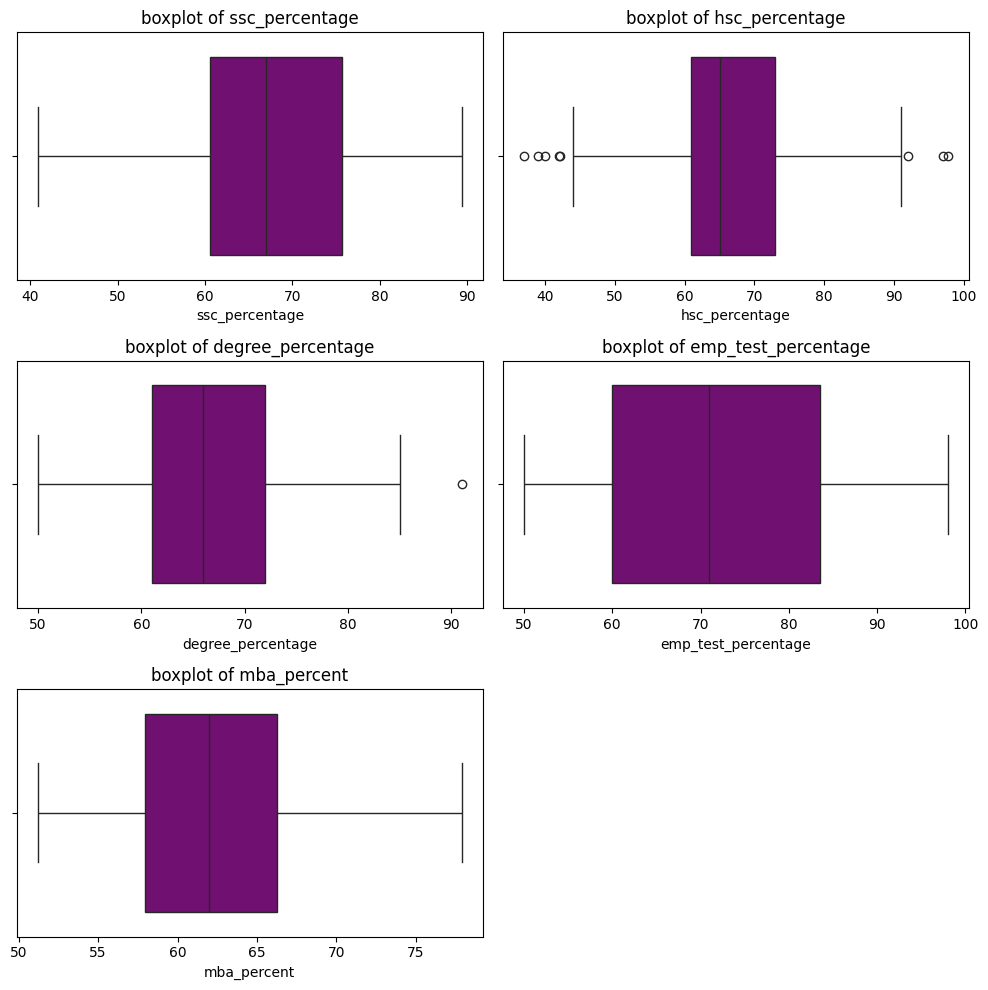

In [15]:
n_cols = 2
n_rows = (len(numerical)+1)//2

plt.figure(figsize=(10,10))
for i, col in enumerate(numerical,1):
    plt.subplot(n_rows,n_cols,i)
    sns.boxplot(x=col,data=data,color='purple')
    plt.title(f"boxplot of {col}")

plt.tight_layout()
plt.show()


## Insights:

1. **ssc\_percentage**

   * No major outliers.
   * Scores are concentrated between 55% and 85%.

2. **hsc\_percentage**

   * A few lower and higher outliers observed.
   * Most values lie between 50% and 80%.

3. **degree\_percentage**

   * One high outlier (\~90%).
   * Central values lie between 60% and 80%.

4. **emp\_test\_percentage**

   * No significant outliers.
   * Evenly distributed between 50% and 100%.

5. **mba\_percent**

   * No outliers.
   * Compact distribution between 55% and 75%.

> **Conclusion:**
> The data is mostly clean with a few mild outliers in **hsc\_percentage** and **degree\_percentage**, but overall distributions look reasonable for modeling.


## Visualizing Categorical Features

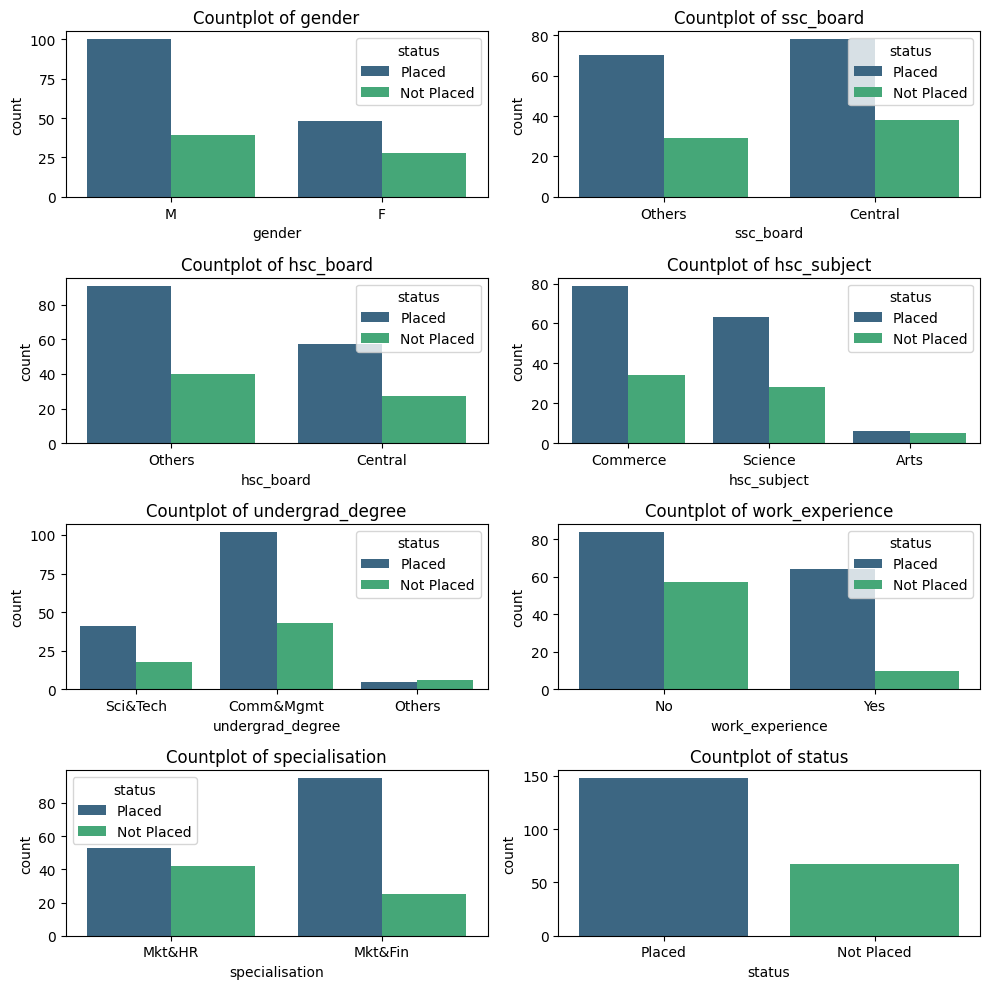

In [16]:
n_cols = 2
n_rows = (len(categorical)+1)//2

plt.figure(figsize=(10,10))
for i,col in enumerate(categorical,1):
    plt.subplot(n_rows,n_cols,i)
    sns.countplot(x=col,data=data,hue='status',palette='viridis')
    plt.title(f'Countplot of {col}')

plt.tight_layout()
plt.show()

### Insights:

1. **Gender:**

   * Males have a higher placement rate compared to females.

2. **SSC Board:**

   * Students from *Central boards* show slightly better placement than *Other board* in SSC.

3. **HSC Board:**

   * Students from *Other boards* show slightly better placement than *Central board* in HSC.

4. **HSC Subject:**

   * *Commerce* students have the highest placement rate, followed by *Science*.
   * *Arts* students are few but mostly placed.

5. **Undergrad Degree:**

   * *Comm\&Mgmt* students are the majority and have a high placement rate.
   * *Sci\&Tech* has more placements relative to their group size.

6. **Work Experience:**

   * Surprisingly, those with **no work experience** are placed more frequently.

7. **Specialisation:**

   * *Mkt\&Fin* specialisation leads to better placement outcomes compared to *Mkt\&HR*.

8. **Status (Target):**

   * Overall, majority of students are placed.


> **Conclusion:**
> Key placement trends are influenced by domain (Commerce, Comm\&Mgmt), specialisation (Mkt\&Fin), and possibly gender and board type. Work experience does not show a clear advantage here.


## Heatmap of Numerical Features

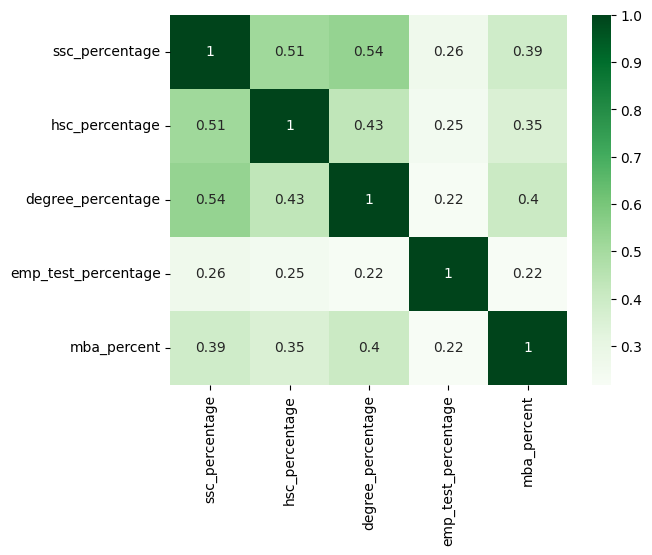

In [17]:
sns.heatmap(data[numerical].corr(),annot=True,cmap='Greens')
plt.show()

### Insights:

1. **Highest Correlation:**

   * ssc_percentage and degree_percentage show the strongest positive correlation (**0.54**), indicating students performing well in school tend to do well in degree too.

2. **Moderate Correlations:**

   * ssc_percentage also correlates moderately with hsc_percentage (0.51) and mba_percent (0.39).
   * degree_percentage has moderate correlation with mba_percent (0.40), suggesting academic consistency.

3. **Weak Correlations:**

   * emp_test_percentage shows low correlation with all features (≤ 0.26), implying it may be independently contributing to prediction.

> **Conclusion:**
> Academic percentages show some expected correlations, but no multicollinearity concern. All features provide distinct information for modeling.


## Pairplot of numerical Features

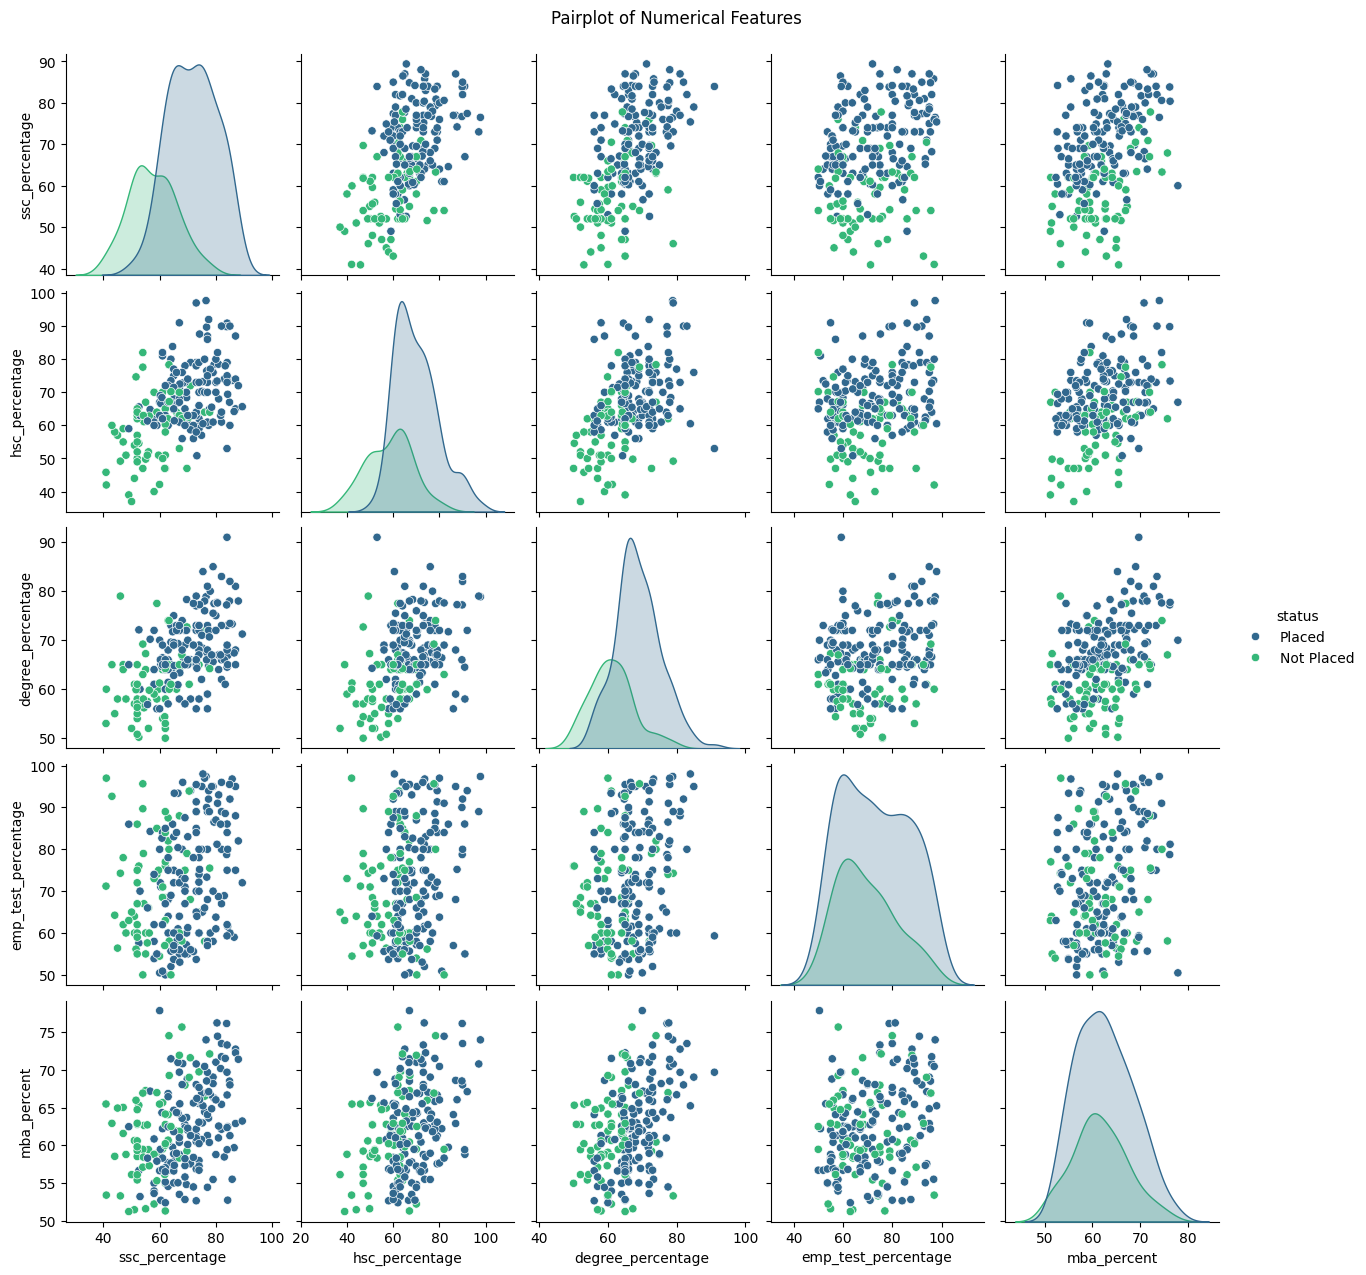

In [18]:
sns.pairplot(data[numerical + ['status']],hue='status',palette='viridis')
plt.suptitle("Pairplot of Numerical Features",y=1.02)
plt.show()

### Insights:

1. **Placed vs Not Placed Distribution**:

   * **Placed students** (blue) generally have higher scores in **all numerical features** compared to Not Placed (green).
   * Especially evident in:

     * ssc_percentage, degree_percentage, and mba_percent.

2. **Positive Trends**:

   * Scatter plots show a **mild positive relationship** between:

     * ssc_percentage vs degree_percentage
     * degree_percentage vs mba_percent
   * Indicates performance consistency across stages.

3. **Separation Patterns**:

   * There is a **visible clustering of 'Placed' students** in the higher score regions.
   * emp_test_percentage shows less separation, meaning it might be **less significant** in classification.

**Conclusion**:
Higher academic scores generally correlate with better placement chances. Features like **degree_percentage** and **mba_percent** show good class separation and might be key predictors.


## Preprocessing Pipeline

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = data.drop('status',axis=1)
y = data['status']

encode = LabelEncoder()
y_encode = encode.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y_encode,test_size=0.2,random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define columns
numerical = ['ssc_percentage','hsc_percentage','degree_percentage','emp_test_percentage','mba_percent']
onehot_cats = ['gender','ssc_board','hsc_board','work_experience','specialisation','hsc_subject','undergrad_degree']

# numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# one-hot pipeline
onehot_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore'))
])

# Combine with ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical),
    ('onehot_pipeline', onehot_pipeline, onehot_cats)
])


In [21]:
# Fit-transform training data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
preprocessor.get_feature_names_out()

array(['num_pipeline__ssc_percentage', 'num_pipeline__hsc_percentage',
       'num_pipeline__degree_percentage',
       'num_pipeline__emp_test_percentage', 'num_pipeline__mba_percent',
       'onehot_pipeline__gender_F', 'onehot_pipeline__gender_M',
       'onehot_pipeline__ssc_board_Central',
       'onehot_pipeline__ssc_board_Others',
       'onehot_pipeline__hsc_board_Central',
       'onehot_pipeline__hsc_board_Others',
       'onehot_pipeline__work_experience_No',
       'onehot_pipeline__work_experience_Yes',
       'onehot_pipeline__specialisation_Mkt&Fin',
       'onehot_pipeline__specialisation_Mkt&HR',
       'onehot_pipeline__hsc_subject_Arts',
       'onehot_pipeline__hsc_subject_Commerce',
       'onehot_pipeline__hsc_subject_Science',
       'onehot_pipeline__undergrad_degree_Comm&Mgmt',
       'onehot_pipeline__undergrad_degree_Others',
       'onehot_pipeline__undergrad_degree_Sci&Tech'], dtype=object)

## Model Building

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
svc = SVC()
svc.fit(X_train_processed,y_train)

y_pred = svc.predict(X_test_processed)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print('='*50)

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print('='*50)

print('Classificaon Report:\n',classification_report(y_test,y_pred))


Accuracy: 0.813953488372093
Precision 0.8285714285714286
Recall: 0.9354838709677419
Confusion Matrix:
 [[ 6  6]
 [ 2 29]]
Classificaon Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.83      0.94      0.88        31

    accuracy                           0.81        43
   macro avg       0.79      0.72      0.74        43
weighted avg       0.81      0.81      0.80        43



## Hyperparameter Tuning

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],               # Regularization strength
    'kernel': ['linear', 'rbf'],     # Kernel types
    'gamma': ['scale', 'auto']       # Kernel coefficient
}

# Initialize SVC
svc = SVC()

# GridSearchCV
grid = GridSearchCV(svc, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train_processed, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_processed)


print("Accuracy:",accuracy_score(y_test,y_pred))
print("precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("="*50)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("="*50)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8837209302325582
precision: 0.90625
Recall: 0.9354838709677419
Confusion Matrix:
 [[ 9  3]
 [ 2 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



### Interpretation:

* Accuracy	88.37%	Overall correct predictions
* Precision	90.63%	91% of predicted placements were correct
* Recall	93.55%	Caught 94% of actual placements
* F1-Score	92%	Excellent balance between precision and recall

* High precision (91%) means very few false placement predictions.

* High recall (94%) means it successfully identifies almost all actual placements.

## Visualizing Decision Boundaries

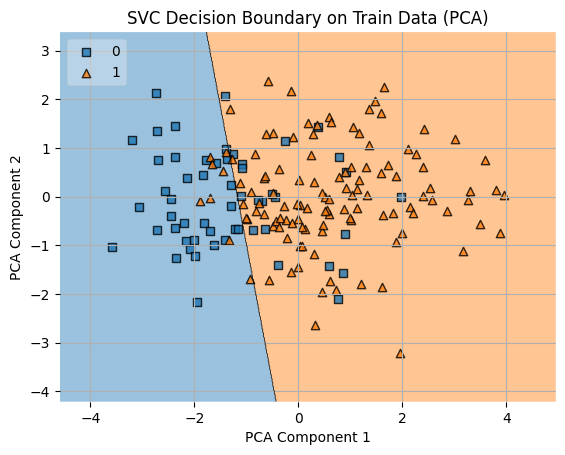

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_processed)
X_test_pca = pca.transform(X_test_processed)

svc = SVC(C=10, gamma='scale', kernel='linear')
svc.fit(X_train_pca,y_train)

## visualizing decision boundaries
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca, y_train, clf=svc, legend=2)

# Label the axes and add a title to the plot
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVC Decision Boundary on Train Data (PCA)")
plt.grid(True)
plt.show()

### Interpretation:

* Class 0 (Not Placed): Mostly falls in the blue region.

* Class 1 (Placed): Mostly in the orange region.

* Boundary line is fairly clean and separates many points correctly.

* Good fit: Model has learned to differentiate classes well on training data.

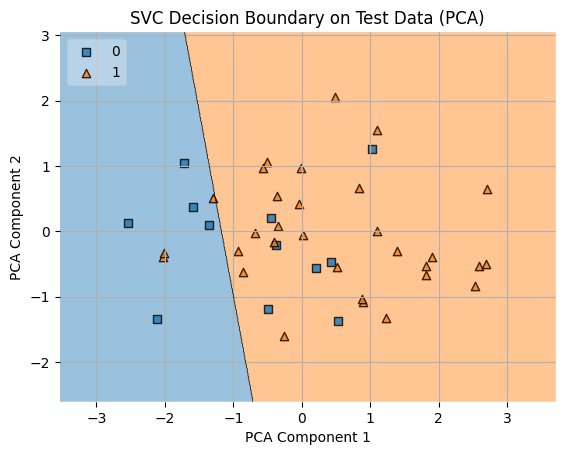

In [26]:
plot_decision_regions(X_test_pca, y_test, clf=svc, legend=2)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVC Decision Boundary on Test Data (PCA)")
plt.grid(True)
plt.show()


### Interpretation:

* The boundary still correctly separates most points.

* A few misclassifications are present, especially near the boundary.

* But decision margin remains strong, which aligns with the earlier test accuracy of 88%.

